In [46]:
import pandas as pd

In [47]:
two_moons_results = pd.read_csv('two_moons_analysis_samples.csv')

In [48]:
two_moons_results.columns

Index(['Unnamed: 0', 'step', 'n_samples', 'n_centers', 'jitter', 'eps',
       'min_pts', 'bandwidth', 'ROCK', 'K_MEANS', 'DBSCAN', 'SPECTRAL',
       'MEAN_SHIFT'],
      dtype='object')

In [49]:
import numpy as np

mean_std = two_moons_results.groupby('n_samples')[['ROCK', 'DBSCAN', 'K_MEANS', 'SPECTRAL', 'MEAN_SHIFT']].agg([np.mean, np.std])

In [50]:
mean_std.index

Int64Index([50, 100, 200, 400, 800, 1600], dtype='int64', name='n_samples')

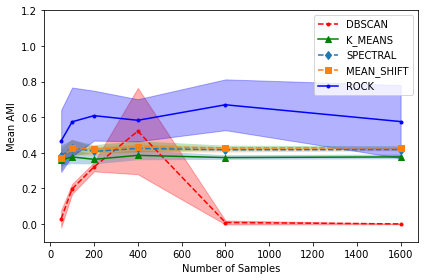

In [52]:
import matplotlib.pyplot as plt



plt.plot(mean_std.index, mean_std['DBSCAN']['mean'], 'r.--', label='DBSCAN')
plt.fill_between(mean_std.index, mean_std['DBSCAN']['mean'] - mean_std['DBSCAN']['std'], mean_std['DBSCAN']['mean'] + mean_std['DBSCAN']['std'], color='r', alpha=0.3)

plt.plot(mean_std.index, mean_std['K_MEANS']['mean'], 'g^-', label='K_MEANS')
plt.fill_between(mean_std.index, mean_std['K_MEANS']['mean'] - mean_std['K_MEANS']['std'], mean_std['K_MEANS']['mean'] + mean_std['K_MEANS']['std'], alpha=0.3)

plt.plot(mean_std.index, mean_std['SPECTRAL']['mean'], 'd--', label='SPECTRAL')
plt.fill_between(mean_std.index, mean_std['SPECTRAL']['mean'] - mean_std['SPECTRAL']['std'], mean_std['SPECTRAL']['mean'] + mean_std['SPECTRAL']['std'], alpha=0.3)

plt.plot(mean_std.index, mean_std['MEAN_SHIFT']['mean'], 's--', label='MEAN_SHIFT')
plt.fill_between(mean_std.index, mean_std['MEAN_SHIFT']['mean'] - mean_std['MEAN_SHIFT']['std'], mean_std['MEAN_SHIFT']['mean'] + mean_std['MEAN_SHIFT']['std'], alpha=0.3)

plt.plot(mean_std.index, mean_std['ROCK']['mean'], 'b.-', label='ROCK')
plt.fill_between(mean_std.index, mean_std['ROCK']['mean'] - mean_std['ROCK']['std'], mean_std['ROCK']['mean'] + mean_std['ROCK']['std'], color='b', alpha=0.3)


plt.ylim(-0.1, 1.2)
plt.legend()
plt.xlabel('Number of Samples')
plt.ylabel('Mean AMI')
plt.tight_layout()
plt.savefig('figures/two_moons_analysis_samples.png')